📊 특별일(SpecialDay) 마케팅 효과 분석

1️⃣ 원본 데이터셋 정보
   전체 데이터 수: 12,330건
   전체 구매 건수: 1,908건
   전체 구매율: 15.47%

2️⃣ 데이터 전처리 시작
   분석 컬럼: SpecialDay, Month, PageValues, Revenue
--------------------------------------------------------------------------------

   📋 결측치 확인:
      SpecialDay: 0건 (0.00%)
      Month: 0건 (0.00%)
      PageValues: 0건 (0.00%)
      Revenue: 0건 (0.00%)

   ✂️  결측치 제거: 0건 제거
   남은 데이터: 12,330건

   📊 이상치 탐지:
      SpecialDay: 0건 (범위: 0~1 벗어남)
      PageValues: 이상치 제거 안 함 (0 포함 모든 값이 의미 있음)
         - 최소값: 0.00
         - 최대값: 361.76
         - 평균값: 5.89
         - 0인 비율: 77.9%

   ✂️  이상치 제거: 0건 제거 (SpecialDay 범위 벗어남)
   최종 데이터: 12,330건 (100.0%)

3️⃣ 전처리 후 데이터 요약
   총 제거: 0건 (0.00%)
   최종 분석 데이터: 12,330건
   최종 구매 건수: 1,908건
   최종 구매율: 15.47%

4️⃣ SpecialDay 분포 확인
   SpecialDay 범위: 0.0 ~ 1.0
   SpecialDay > 0인 데이터: 1,251건
   SpecialDay 평균: 0.0614
   SpecialDay 중앙값: 0.0000

5️⃣ 특별일 vs 일반일 구매율 비교
-------------------------------------------------------------------------------

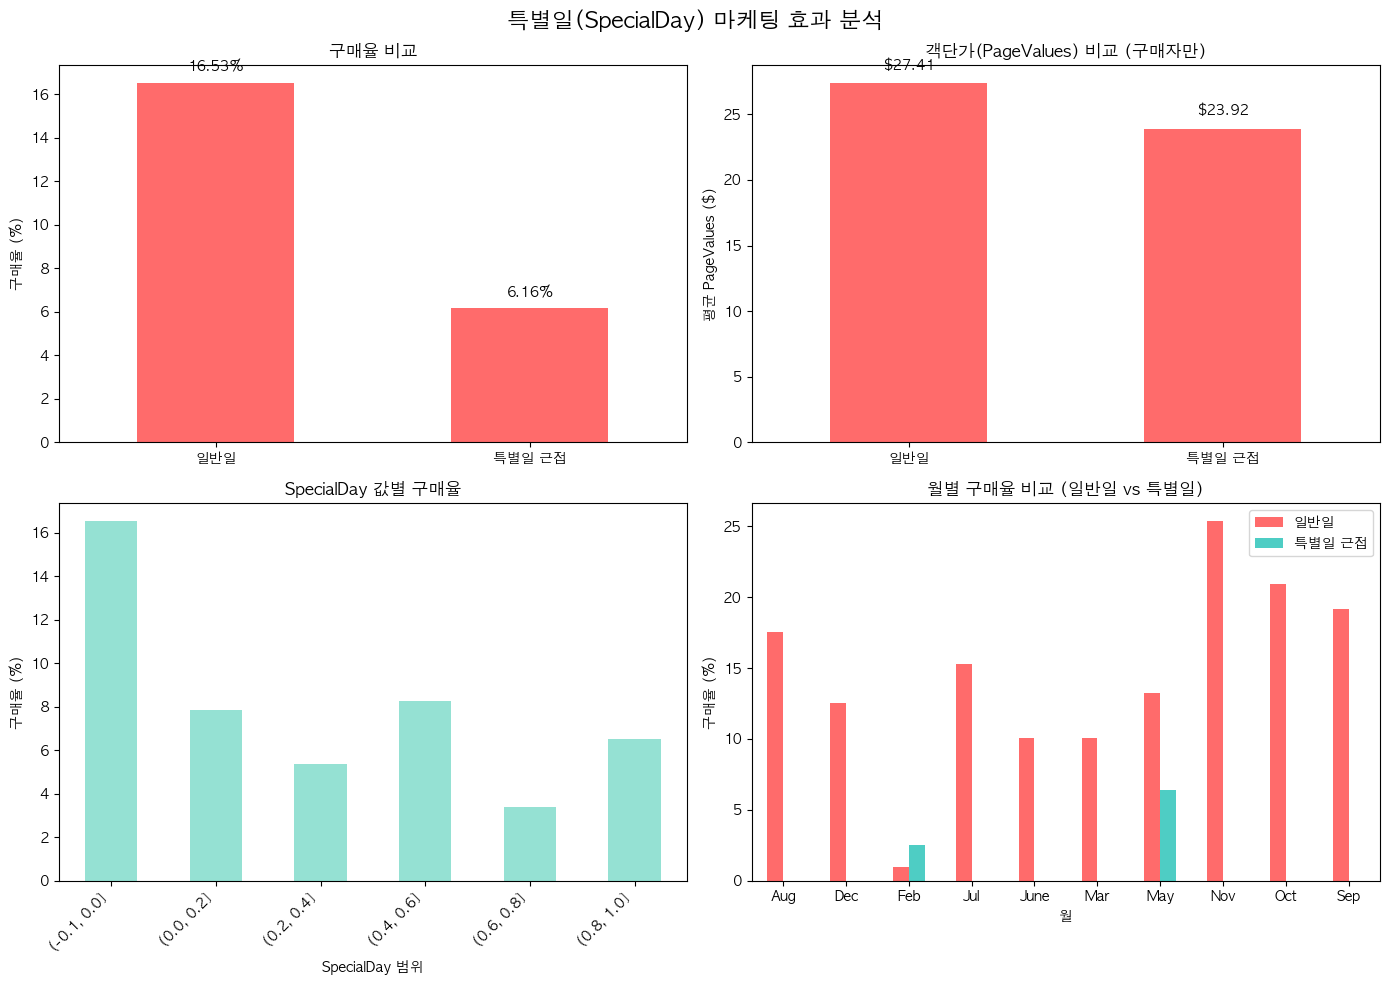

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('/Users/h/Desktop/ms/vscode/my/dataton_project/data/online_shoppers/online_shoppers_intention.csv')

print("=" * 80)
print("📊 특별일(SpecialDay) 마케팅 효과 분석")
print("=" * 80)
print()

# 1. 원본 데이터 기본 정보
print("1️⃣ 원본 데이터셋 정보")
print(f"   전체 데이터 수: {len(df):,}건")
print(f"   전체 구매 건수: {df['Revenue'].sum():,}건")
print(f"   전체 구매율: {df['Revenue'].mean()*100:.2f}%")
print()

# 2. 전처리: 분석에 사용할 컬럼 선택
analysis_columns = ['SpecialDay', 'Month', 'PageValues', 'Revenue']
print("2️⃣ 데이터 전처리 시작")
print(f"   분석 컬럼: {', '.join(analysis_columns)}")
print("-" * 80)

# 2-1. 결측치 확인 및 제거
print("\n   📋 결측치 확인:")
missing_counts = df[analysis_columns].isnull().sum()
for col in analysis_columns:
    missing = missing_counts[col]
    missing_pct = (missing / len(df)) * 100
    print(f"      {col}: {missing}건 ({missing_pct:.2f}%)")

# 결측치가 있는 행 제거
df_clean = df[analysis_columns].dropna()
removed_missing = len(df) - len(df_clean)
print(f"\n   ✂️  결측치 제거: {removed_missing}건 제거")
print(f"   남은 데이터: {len(df_clean):,}건")

# 2-2. 이상치 확인 및 제거
print("\n   📊 이상치 탐지:")

# SpecialDay 이상치만 확인 (0~1 범위를 벗어나는 값)
specialday_outliers = (df_clean['SpecialDay'] < 0) | (df_clean['SpecialDay'] > 1)
print(f"      SpecialDay: {specialday_outliers.sum()}건 (범위: 0~1 벗어남)")

# PageValues는 이상치 제거 안 함 (0이 많은 것이 정상적인 분포)
print(f"      PageValues: 이상치 제거 안 함 (0 포함 모든 값이 의미 있음)")
print(f"         - 최소값: {df_clean['PageValues'].min():.2f}")
print(f"         - 최대값: {df_clean['PageValues'].max():.2f}")
print(f"         - 평균값: {df_clean['PageValues'].mean():.2f}")
print(f"         - 0인 비율: {(df_clean['PageValues'] == 0).sum() / len(df_clean) * 100:.1f}%")

# SpecialDay 이상치만 제거
df_clean = df_clean[~specialday_outliers]

removed_outliers = specialday_outliers.sum()
print(f"\n   ✂️  이상치 제거: {removed_outliers}건 제거 (SpecialDay 범위 벗어남)")
print(f"   최종 데이터: {len(df_clean):,}건 ({len(df_clean)/len(df)*100:.1f}%)")
print()

# 2-3. 전처리 후 데이터 요약
print("3️⃣ 전처리 후 데이터 요약")
print(f"   총 제거: {removed_missing + removed_outliers}건 ({(removed_missing + removed_outliers)/len(df)*100:.2f}%)")
print(f"   최종 분석 데이터: {len(df_clean):,}건")
print(f"   최종 구매 건수: {df_clean['Revenue'].sum():,}건")
print(f"   최종 구매율: {df_clean['Revenue'].mean()*100:.2f}%")
print()

# df를 df_clean으로 교체하여 이후 분석 진행
df = df_clean

# 2. SpecialDay 변수 탐색
print("4️⃣ SpecialDay 분포 확인")
print(f"   SpecialDay 범위: {df['SpecialDay'].min()} ~ {df['SpecialDay'].max()}")
print(f"   SpecialDay > 0인 데이터: {(df['SpecialDay'] > 0).sum():,}건")
print(f"   SpecialDay 평균: {df['SpecialDay'].mean():.4f}")
print(f"   SpecialDay 중앙값: {df['SpecialDay'].median():.4f}")
print()

# 3. 특별일 그룹 정의
# SpecialDay가 0이면 일반일, 0보다 크면 특별일 근접 기간
df['is_special_period'] = df['SpecialDay'] > 0

# 4. 구매율 비교 (카이제곱 검정)
print("5️⃣ 특별일 vs 일반일 구매율 비교")
print("-" * 80)

# 일반일과 특별일 근접 기간의 구매율 계산
normal_days = df[df['is_special_period'] == False]
special_days = df[df['is_special_period'] == True]

normal_purchase_rate = normal_days['Revenue'].mean() * 100
special_purchase_rate = special_days['Revenue'].mean() * 100

print(f"   🔹 일반일 구매율: {normal_purchase_rate:.2f}% (n={len(normal_days):,})")
print(f"   🔹 특별일 근접 구매율: {special_purchase_rate:.2f}% (n={len(special_days):,})")
print(f"   🔹 구매율 차이: {special_purchase_rate - normal_purchase_rate:+.2f}%p")
print(f"   🔹 구매율 증가율: {((special_purchase_rate/normal_purchase_rate - 1)*100):+.2f}%")
print()

# 카이제곱 검정으로 통계적 유의성 확인
contingency_table = pd.crosstab(df['is_special_period'], df['Revenue'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"   📈 카이제곱 검정 결과:")
print(f"      chi2 통계량: {chi2:.4f}")
print(f"      p-value: {p_value:.4f}")
if p_value < 0.05:
    print(f"      ✅ 통계적으로 유의함 (p < 0.05) - 구매율 차이가 실제로 존재!")
else:
    print(f"      ❌ 통계적으로 유의하지 않음 (p >= 0.05)")
print()

# 5. 객단가(PageValues) 비교 (t-검정)
print("6️⃣ 특별일 vs 일반일 객단가(PageValues) 비교")
print("-" * 80)

# 구매한 고객만 필터링하여 객단가 비교
normal_buyers = normal_days[normal_days['Revenue'] == True]
special_buyers = special_days[special_days['Revenue'] == True]

if len(special_buyers) > 0:
    normal_avg_value = normal_buyers['PageValues'].mean()
    special_avg_value = special_buyers['PageValues'].mean()
    
    print(f"   🔹 일반일 평균 PageValues: ${normal_avg_value:.2f}")
    print(f"   🔹 특별일 평균 PageValues: ${special_avg_value:.2f}")
    print(f"   🔹 객단가 차이: ${special_avg_value - normal_avg_value:+.2f}")
    print(f"   🔹 객단가 증가율: {((special_avg_value/normal_avg_value - 1)*100):+.2f}%")
    print()
    
    # t-검정으로 통계적 유의성 확인
    t_stat, t_pvalue = stats.ttest_ind(
        normal_buyers['PageValues'].dropna(), 
        special_buyers['PageValues'].dropna()
    )
    
    print(f"   📈 독립표본 t-검정 결과:")
    print(f"      t 통계량: {t_stat:.4f}")
    print(f"      p-value: {t_pvalue:.4f}")
    if t_pvalue < 0.05:
        print(f"      ✅ 통계적으로 유의함 (p < 0.05) - 객단가 차이가 실제로 존재!")
    else:
        print(f"      ❌ 통계적으로 유의하지 않음 (p >= 0.05)")
else:
    print("   ⚠️  특별일 근접 기간에 구매 데이터가 없어 객단가 비교 불가")
print()

# 6. 월별 특별일 효과 분석
print("7️⃣ 월별 특별일 효과 분석")
print("-" * 80)

monthly_analysis = df.groupby(['Month', 'is_special_period']).agg({
    'Revenue': ['count', 'sum', 'mean'],
    'PageValues': 'mean'
}).round(4)

print("   월별 구매율 및 PageValues 비교:")
print(monthly_analysis)
print()

# 7. 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('특별일(SpecialDay) 마케팅 효과 분석', fontsize=16, fontweight='bold')

# 그래프 1: 구매율 비교 바차트
ax1 = axes[0, 0]
comparison_data = pd.DataFrame({
    '일반일': [normal_purchase_rate],
    '특별일 근접': [special_purchase_rate]
})
comparison_data.T.plot(kind='bar', ax=ax1, legend=False, color=['#FF6B6B', '#4ECDC4'])
ax1.set_title('구매율 비교', fontsize=12, fontweight='bold')
ax1.set_ylabel('구매율 (%)')
ax1.set_xlabel('')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
for i, v in enumerate([normal_purchase_rate, special_purchase_rate]):
    ax1.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontweight='bold')

# 그래프 2: 객단가(PageValues) 비교
ax2 = axes[0, 1]
if len(special_buyers) > 0:
    value_comparison = pd.DataFrame({
        '일반일': [normal_avg_value],
        '특별일 근접': [special_avg_value]
    })
    value_comparison.T.plot(kind='bar', ax=ax2, legend=False, color=['#FF6B6B', '#4ECDC4'])
    ax2.set_title('객단가(PageValues) 비교 (구매자만)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('평균 PageValues ($)')
    ax2.set_xlabel('')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
    for i, v in enumerate([normal_avg_value, special_avg_value]):
        ax2.text(i, v + 1, f'${v:.2f}', ha='center', fontweight='bold')

# 그래프 3: SpecialDay 값에 따른 구매율 변화
ax3 = axes[1, 0]
specialday_bins = pd.cut(df['SpecialDay'], bins=[-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1.0])
purchase_by_specialday = df.groupby(specialday_bins, observed=True)['Revenue'].mean() * 100
purchase_by_specialday.plot(kind='bar', ax=ax3, color='#95E1D3')
ax3.set_title('SpecialDay 값별 구매율', fontsize=12, fontweight='bold')
ax3.set_ylabel('구매율 (%)')
ax3.set_xlabel('SpecialDay 범위')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# 그래프 4: 월별 특별일 효과
ax4 = axes[1, 1]
monthly_purchase = df.groupby(['Month', 'is_special_period'])['Revenue'].mean() * 100
monthly_pivot = monthly_purchase.unstack()
monthly_pivot.plot(kind='bar', ax=ax4, color=['#FF6B6B', '#4ECDC4'])
ax4.set_title('월별 구매율 비교 (일반일 vs 특별일)', fontsize=12, fontweight='bold')
ax4.set_ylabel('구매율 (%)')
ax4.set_xlabel('월')
ax4.legend(['일반일', '특별일 근접'], loc='upper right')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)

plt.tight_layout()
# plt.savefig('special_day_analysis.png', dpi=300, bbox_inches='tight')
# print("📊 그래프가 'special_day_analysis.png'로 저장되었습니다!")
print()

# 8. 최종 결론
print("=" * 80)
print("🎯 가설 검정 최종 결론")
print("=" * 80)

if p_value < 0.05:
    conclusion1 = f"✅ 특별일 근접 기간의 구매율이 일반일 대비 {special_purchase_rate - normal_purchase_rate:+.2f}%p 차이가 있으며, 통계적으로 유의합니다."
else:
    conclusion1 = f"❌ 특별일 효과가 통계적으로 유의하지 않습니다 (p={p_value:.4f})"

print(f"1. 구매율 차이: {conclusion1}")

if len(special_buyers) > 0 and t_pvalue < 0.05:
    conclusion2 = f"✅ 특별일 근접 기간의 객단가가 ${special_avg_value - normal_avg_value:+.2f} 높으며, 통계적으로 유의합니다."
elif len(special_buyers) > 0:
    conclusion2 = f"❌ 객단가 차이가 통계적으로 유의하지 않습니다 (p={t_pvalue:.4f})"
else:
    conclusion2 = "⚠️  데이터 부족으로 객단가 비교 불가"

print(f"2. 객단가 차이: {conclusion2}")
print()
print("💡 마케팅 시사점:")
if p_value < 0.05 or (len(special_buyers) > 0 and t_pvalue < 0.05):
    print("   - 특별일(SpecialDay) 근접 기간에 프로모션을 집중하면 효과적입니다")
    print("   - 반려동물 관련 기념일 캘린더를 구축하여 선제적 마케팅 실행 권장")
    print("   - 특별일 2주 전부터 이메일/푸시 알림 발송 전략 수립")
else:
    print("   - 현재 데이터에서는 특별일 효과가 명확하지 않습니다")
    print("   - 더 많은 특별일 데이터를 수집하거나, 다른 마케팅 전략 고려 필요")
print("=" * 80)

```python
❌ 특별일 프로모션 ❌
✅ 평일 깜짝 특가 이벤트
✅ "비수기 한정" 프리미엄 혜택

→ 경쟁 덜한 시기에 마진 높은 판매

### 전략 2️⃣: **특별일 방문자를 "리타게팅 풀"로 활용**

특별일 방문자 = 잠재 고객 DB
→ 특별일 이후 3일간 집중 리타게팅
→ "고민하셨죠? 지금이 마지막 기회" 메시지


### 전략 3️⃣: **특별일 "사전 예약" 시스템**

특별일 1주일 전부터:
→ "예약 구매 시 추가 5% 할인"
→ 특별일 당일 배송 보장
→ 구매 의사 있는 고객만 선별 확보


### 전략 4️⃣: **특별일 = 브랜딩 기회**

매출보다 "인지도 확보"에 집중
→ 무료 샘플 배포
→ 수의사 상담 이벤트
→ 장기 고객 확보 전략
```

🎁 특별일(SpecialDay) vs 일반일 상세 분석

전체 데이터: 12,330건
전체 구매율: 15.47%
전처리 후 데이터: 12,330건

일반일: 11,079건
특별일 근접: 1,251건

📅 월별 일반일 vs 특별일 근접 구매율 비교

월별 구매율 상세:
Month  특별일여부  구매수  세션수       구매율
  Feb    일반일    1  105  0.952381
  Feb 특별일 근접    2   79  2.531646
  Mar    일반일  192 1907 10.068170
  May    일반일  290 2192 13.229927
  May 특별일 근접   75 1172  6.399317
 June    일반일   29  288 10.069444
  Jul    일반일   66  432 15.277778
  Aug    일반일   76  433 17.551963
  Sep    일반일   86  448 19.196429
  Oct    일반일  115  549 20.947177
  Nov    일반일  760 2998 25.350233
  Dec    일반일  216 1727 12.507238

🔍 일반일 구매율 TOP 5 (블랙프라이데이 시즌 찾기)

일반일 중 구매율 TOP 5:
  Nov: 25.35% (구매: 760건 / 세션: 2998건)
  Oct: 20.95% (구매: 115건 / 세션: 549건)
  Sep: 19.20% (구매: 86건 / 세션: 448건)
  Aug: 17.55% (구매: 76건 / 세션: 433건)
  Jul: 15.28% (구매: 66건 / 세션: 432건)

🛍️ 블랙프라이데이 시즌(11월) 특별 분석

11월 전체 세션: 2,998건
  - 일반일: 2,998건 (구매율: 25.35%)
  - 특별일 근접: 0건 (구매율: nan%)

💡 인사이트:
  전체 평균 구매율: 15.47%
  11월 일반일 구매율: 25.35%
  → 11월 일반일이 전체 평균보다 +9.88%p 높음
  ✅ 블랙프

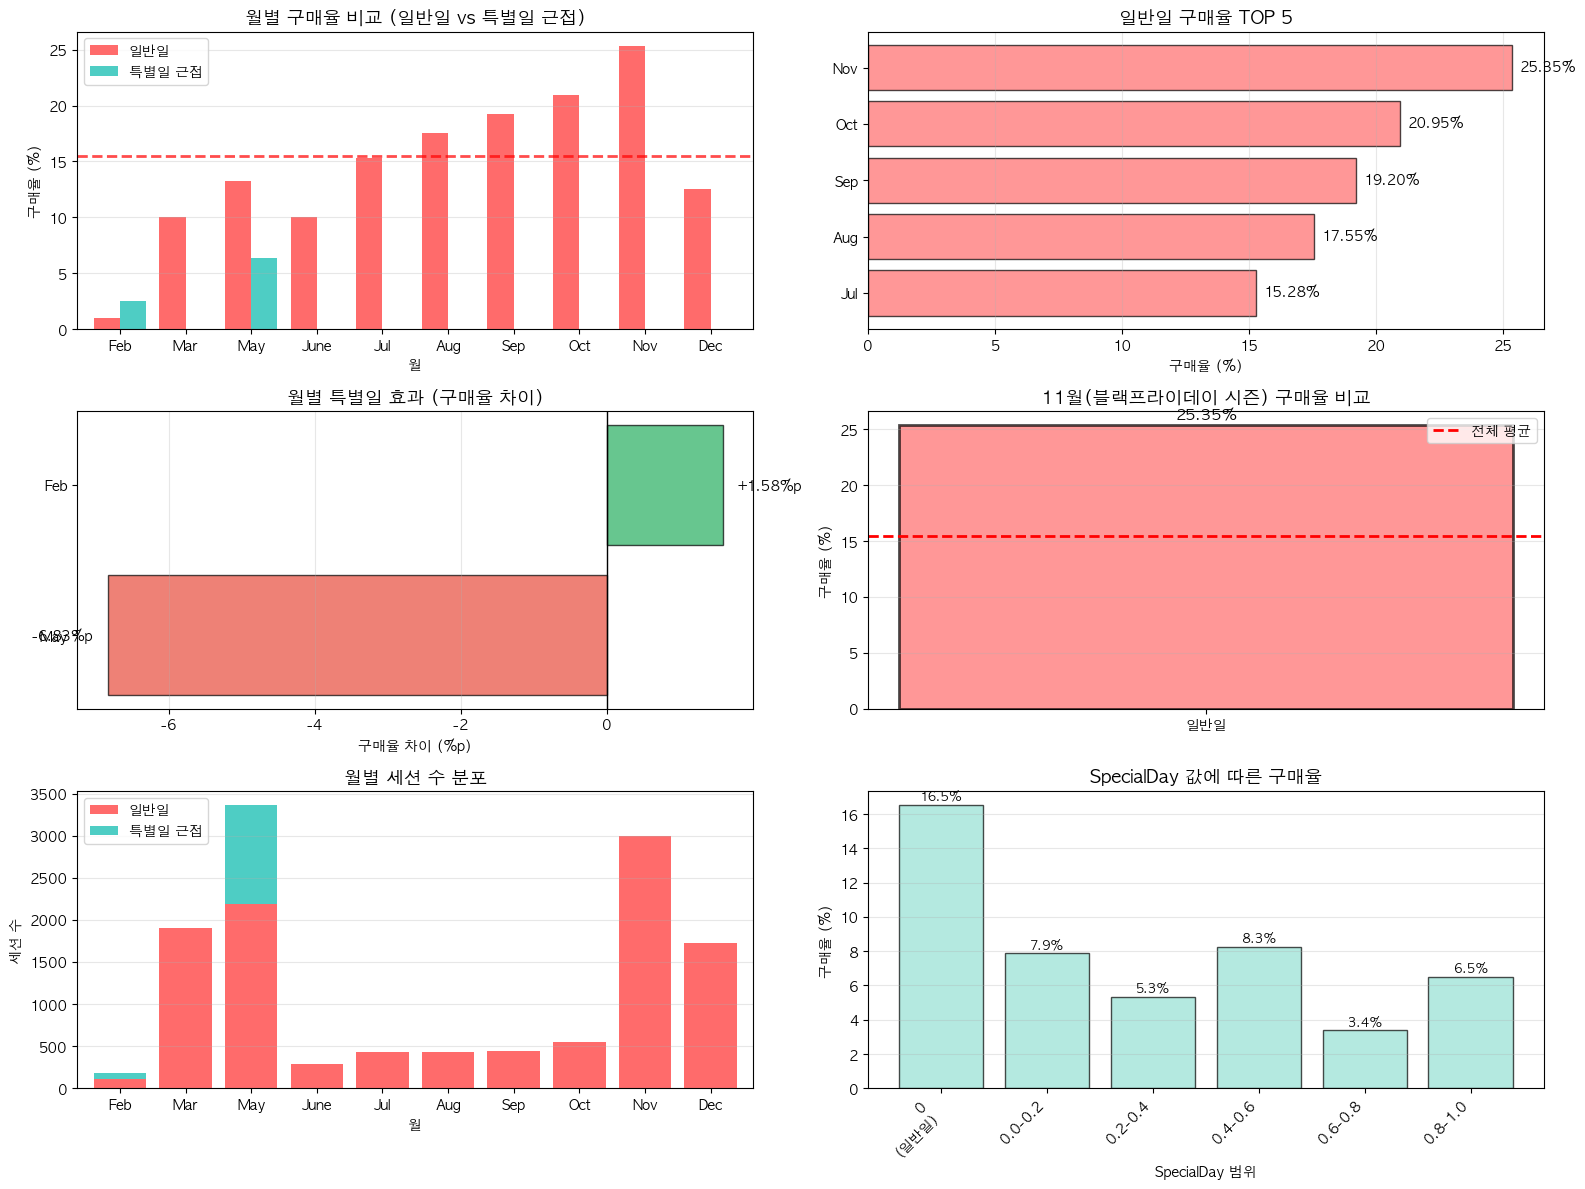


🎯 최종 분석 결론

1️⃣ 일반일 중 구매율이 높은 시즌:
   🏆 Nov: 25.35%
   → 블랙프라이데이 효과로 보입니다!

2️⃣ 특별일 효과가 가장 큰 월:
   🏆 Feb: +1.58%p 증가
   (일반일 0.95% → 특별일 2.53%)

3️⃣ 블랙프라이데이(11월) 인사이트:
   • 11월 일반일 구매율: 25.35%
   • 전체 평균 대비: +9.88%p
   ✅ 블랙프라이데이 시즌에 구매 활동이 활발합니다!

💡 마케팅 추천:
   • 11월(블랙프라이데이)에 집중 프로모션 진행
   • 특별일 효과가 큰 월에는 특별일 마케팅 강화
   • 구매율이 높은 일반일 시즌을 공략하는 전략 수립


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'appleGothic'
plt.rcParams['axes.unicode_minus'] = False

# ========================================
# 1. 데이터 로드 및 기본 전처리
# ========================================
df = pd.read_csv('/Users/h/Desktop/ms/vscode/my/dataton_project/data/online_shoppers/online_shoppers_intention.csv')

print("=" * 80)
print("🎁 특별일(SpecialDay) vs 일반일 상세 분석")
print("=" * 80)
print(f"\n전체 데이터: {len(df):,}건")
print(f"전체 구매율: {df['Revenue'].mean()*100:.2f}%")

# 필요한 컬럼만 선택
df_clean = df[['SpecialDay', 'Month', 'PageValues', 'Revenue']].dropna()

# SpecialDay 이상치 제거 (0~1 범위)
df_clean = df_clean[(df_clean['SpecialDay'] >= 0) & (df_clean['SpecialDay'] <= 1)]

print(f"전처리 후 데이터: {len(df_clean):,}건")

# ========================================
# 2. 특별일 여부 구분
# ========================================
# SpecialDay > 0이면 특별일 근접 기간
df_clean['특별일여부'] = df_clean['SpecialDay'].apply(
    lambda x: '특별일 근접' if x > 0 else '일반일'
)

print(f"\n일반일: {(df_clean['특별일여부'] == '일반일').sum():,}건")
print(f"특별일 근접: {(df_clean['특별일여부'] == '특별일 근접').sum():,}건")

# ========================================
# 3. 월별 + 특별일 여부별 구매율 계산
# ========================================
print("\n" + "=" * 80)
print("📅 월별 일반일 vs 특별일 근접 구매율 비교")
print("=" * 80)

# 월별 구매율 계산
월별분석 = df_clean.groupby(['Month', '특별일여부'], observed=True).agg({
    'Revenue': ['sum', 'count', 'mean']
}).reset_index()

월별분석.columns = ['Month', '특별일여부', '구매수', '세션수', '구매율']
월별분석['구매율'] = 월별분석['구매율'] * 100

# 월 순서 정렬
월순서 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
월별분석['Month'] = pd.Categorical(월별분석['Month'], categories=월순서, ordered=True)
월별분석 = 월별분석.sort_values('Month')

print("\n월별 구매율 상세:")
print(월별분석.to_string(index=False))

# ========================================
# 4. 일반일 중에서 구매율이 높은 월 찾기
# ========================================
print("\n" + "=" * 80)
print("🔍 일반일 구매율 TOP 5 (블랙프라이데이 시즌 찾기)")
print("=" * 80)

일반일데이터 = 월별분석[월별분석['특별일여부'] == '일반일'].copy()
일반일TOP5 = 일반일데이터.nlargest(5, '구매율')

print("\n일반일 중 구매율 TOP 5:")
for idx, row in 일반일TOP5.iterrows():
    print(f"  {row['Month']}: {row['구매율']:.2f}% (구매: {row['구매수']:.0f}건 / 세션: {row['세션수']:.0f}건)")

# ========================================
# 5. 블랙프라이데이 시즌 확인 (11월)
# ========================================
print("\n" + "=" * 80)
print("🛍️ 블랙프라이데이 시즌(11월) 특별 분석")
print("=" * 80)

# 11월 데이터만 추출
nov_data = df_clean[df_clean['Month'] == 'Nov']

nov_일반일 = nov_data[nov_data['특별일여부'] == '일반일']
nov_특별일 = nov_data[nov_data['특별일여부'] == '특별일 근접']

print(f"\n11월 전체 세션: {len(nov_data):,}건")
print(f"  - 일반일: {len(nov_일반일):,}건 (구매율: {nov_일반일['Revenue'].mean()*100:.2f}%)")
print(f"  - 특별일 근접: {len(nov_특별일):,}건 (구매율: {nov_특별일['Revenue'].mean()*100:.2f}%)")

# 블랙프라이데이 효과 확인
if len(nov_일반일) > 0:
    전체평균 = df_clean['Revenue'].mean() * 100
    nov일반일평균 = nov_일반일['Revenue'].mean() * 100
    
    print(f"\n💡 인사이트:")
    print(f"  전체 평균 구매율: {전체평균:.2f}%")
    print(f"  11월 일반일 구매율: {nov일반일평균:.2f}%")
    print(f"  → 11월 일반일이 전체 평균보다 {nov일반일평균 - 전체평균:+.2f}%p {'높음' if nov일반일평균 > 전체평균 else '낮음'}")
    
    if nov일반일평균 > 전체평균:
        print(f"  ✅ 블랙프라이데이 시즌 효과가 있습니다!")

# ========================================
# 6. 특별일 효과가 큰 월 찾기
# ========================================
print("\n" + "=" * 80)
print("🎯 특별일 효과가 가장 큰 월 찾기")
print("=" * 80)

# 월별로 일반일과 특별일의 구매율 차이 계산
효과분석 = 월별분석.pivot(index='Month', columns='특별일여부', values='구매율').reset_index()
효과분석['효과차이'] = 효과분석['특별일 근접'] - 효과분석['일반일']
효과분석 = 효과분석.sort_values('효과차이', ascending=False)

print("\n월별 특별일 효과 (구매율 차이):")
for idx, row in 효과분석.iterrows():
    if pd.notna(row['효과차이']):
        print(f"  {row['Month']}: {row['효과차이']:+.2f}%p (일반일: {row['일반일']:.2f}% → 특별일: {row['특별일 근접']:.2f}%)")

# ========================================
# 7. 시각화
# ========================================
fig = plt.figure(figsize=(16, 12))

# 7-1. 월별 구매율 비교 (일반일 vs 특별일)
ax1 = plt.subplot(3, 2, 1)
월별피벗 = 월별분석.pivot(index='Month', columns='특별일여부', values='구매율')
월별피벗.plot(kind='bar', ax=ax1, color=['#FF6B6B', '#4ECDC4'], width=0.8)
ax1.set_title('월별 구매율 비교 (일반일 vs 특별일 근접)', fontsize=13, fontweight='bold')
ax1.set_ylabel('구매율 (%)', fontweight='bold')
ax1.set_xlabel('월', fontweight='bold')
ax1.legend(['일반일', '특별일 근접'], loc='upper left')
ax1.tick_params(axis='x', rotation=0)
ax1.grid(axis='y', alpha=0.3)
ax1.axhline(y=df_clean['Revenue'].mean()*100, color='red', linestyle='--', 
            linewidth=2, label='전체 평균', alpha=0.7)

# 7-2. 일반일 구매율 TOP 5
ax2 = plt.subplot(3, 2, 2)
일반일TOP5_sorted = 일반일TOP5.sort_values('구매율', ascending=True)
ax2.barh(일반일TOP5_sorted['Month'].astype(str), 일반일TOP5_sorted['구매율'], 
         color='#FF6B6B', alpha=0.7, edgecolor='black')
ax2.set_title('일반일 구매율 TOP 5', fontsize=13, fontweight='bold')
ax2.set_xlabel('구매율 (%)', fontweight='bold')
for i, (month, rate) in enumerate(zip(일반일TOP5_sorted['Month'], 일반일TOP5_sorted['구매율'])):
    ax2.text(rate + 0.3, i, f'{rate:.2f}%', va='center', fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# 7-3. 특별일 효과 차이 (구매율 증감)
ax3 = plt.subplot(3, 2, 3)
효과분석_정렬 = 효과분석.dropna(subset=['효과차이']).sort_values('효과차이', ascending=True)
colors = ['#27ae60' if x > 0 else '#e74c3c' for x in 효과분석_정렬['효과차이']]
ax3.barh(효과분석_정렬['Month'].astype(str), 효과분석_정렬['효과차이'], 
         color=colors, alpha=0.7, edgecolor='black')
ax3.set_title('월별 특별일 효과 (구매율 차이)', fontsize=13, fontweight='bold')
ax3.set_xlabel('구매율 차이 (%p)', fontweight='bold')
ax3.axvline(x=0, color='black', linestyle='-', linewidth=1)
for i, (month, diff) in enumerate(zip(효과분석_정렬['Month'], 효과분석_정렬['효과차이'])):
    ax3.text(diff + (0.2 if diff > 0 else -0.2), i, f'{diff:+.2f}%p', 
             va='center', ha='left' if diff > 0 else 'right', fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# 7-4. 11월 상세 분석
ax4 = plt.subplot(3, 2, 4)
if len(nov_data) > 0:
    nov_비교 = nov_data.groupby('특별일여부', observed=True)['Revenue'].mean() * 100
    bars = ax4.bar(nov_비교.index, nov_비교.values, color=['#FF6B6B', '#4ECDC4'], 
                   alpha=0.7, edgecolor='black', linewidth=2)
    ax4.set_title('11월(블랙프라이데이 시즌) 구매율 비교', fontsize=13, fontweight='bold')
    ax4.set_ylabel('구매율 (%)', fontweight='bold')
    ax4.axhline(y=df_clean['Revenue'].mean()*100, color='red', linestyle='--', 
                linewidth=2, label='전체 평균')
    for i, (bar, val) in enumerate(zip(bars, nov_비교.values)):
        ax4.text(i, val + 0.5, f'{val:.2f}%', ha='center', fontweight='bold', fontsize=11)
    ax4.legend()
    ax4.grid(axis='y', alpha=0.3)

# 7-5. 월별 세션 수 (일반일 vs 특별일)
ax5 = plt.subplot(3, 2, 5)
월별세션 = 월별분석.pivot(index='Month', columns='특별일여부', values='세션수')
월별세션.plot(kind='bar', ax=ax5, color=['#FF6B6B', '#4ECDC4'], width=0.8, stacked=True)
ax5.set_title('월별 세션 수 분포', fontsize=13, fontweight='bold')
ax5.set_ylabel('세션 수', fontweight='bold')
ax5.set_xlabel('월', fontweight='bold')
ax5.legend(['일반일', '특별일 근접'], loc='upper left')
ax5.tick_params(axis='x', rotation=0)
ax5.grid(axis='y', alpha=0.3)

# 7-6. SpecialDay 값별 구매율
ax6 = plt.subplot(3, 2, 6)
specialday_bins = pd.cut(df_clean['SpecialDay'], 
                         bins=[-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1.0],
                         labels=['0\n(일반일)', '0.0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0'])
구매율_by_special = df_clean.groupby(specialday_bins, observed=True)['Revenue'].mean() * 100
bars = ax6.bar(range(len(구매율_by_special)), 구매율_by_special.values, 
               color='#95E1D3', alpha=0.7, edgecolor='black')
ax6.set_title('SpecialDay 값에 따른 구매율', fontsize=13, fontweight='bold')
ax6.set_ylabel('구매율 (%)', fontweight='bold')
ax6.set_xlabel('SpecialDay 범위', fontweight='bold')
ax6.set_xticks(range(len(구매율_by_special)))
ax6.set_xticklabels(구매율_by_special.index, rotation=45, ha='right')
for i, val in enumerate(구매율_by_special.values):
    ax6.text(i, val + 0.3, f'{val:.1f}%', ha='center', fontweight='bold', fontsize=9)
ax6.grid(axis='y', alpha=0.3)

plt.tight_layout()
# plt.savefig('specialday_detailed_analysis.png', dpi=300, bbox_inches='tight')
# print("\n📊 그래프가 'specialday_detailed_analysis.png'로 저장되었습니다!")
plt.show()

# ========================================
# 8. 최종 결론
# ========================================
print("\n" + "=" * 80)
print("🎯 최종 분석 결론")
print("=" * 80)

print("\n1️⃣ 일반일 중 구매율이 높은 시즌:")
top_month = 일반일TOP5.iloc[0]
print(f"   🏆 {top_month['Month']}: {top_month['구매율']:.2f}%")
if top_month['Month'] == 'Nov':
    print(f"   → 블랙프라이데이 효과로 보입니다!")

print("\n2️⃣ 특별일 효과가 가장 큰 월:")
효과최대월 = 효과분석.iloc[0]
if pd.notna(효과최대월['효과차이']):
    print(f"   🏆 {효과최대월['Month']}: {효과최대월['효과차이']:+.2f}%p 증가")
    print(f"   (일반일 {효과최대월['일반일']:.2f}% → 특별일 {효과최대월['특별일 근접']:.2f}%)")

print("\n3️⃣ 블랙프라이데이(11월) 인사이트:")
if len(nov_일반일) > 0:
    print(f"   • 11월 일반일 구매율: {nov일반일평균:.2f}%")
    print(f"   • 전체 평균 대비: {nov일반일평균 - 전체평균:+.2f}%p")
    if nov일반일평균 > 전체평균:
        print(f"   ✅ 블랙프라이데이 시즌에 구매 활동이 활발합니다!")

print("\n💡 마케팅 추천:")
print("   • 11월(블랙프라이데이)에 집중 프로모션 진행")
print("   • 특별일 효과가 큰 월에는 특별일 마케팅 강화")
print("   • 구매율이 높은 일반일 시즌을 공략하는 전략 수립")
print("=" * 80)